## Imports Used

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading in the data

In [50]:
train = pd.read_csv('data/train.csv', header=0)
test = pd.read_csv('data/test.csv', header=0)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We plot the two different graphs here on how gender played a part in survival outcome for reference. We can see that for female passengers tend to survive than male, but younger male passengers had a similar outcome to female. 

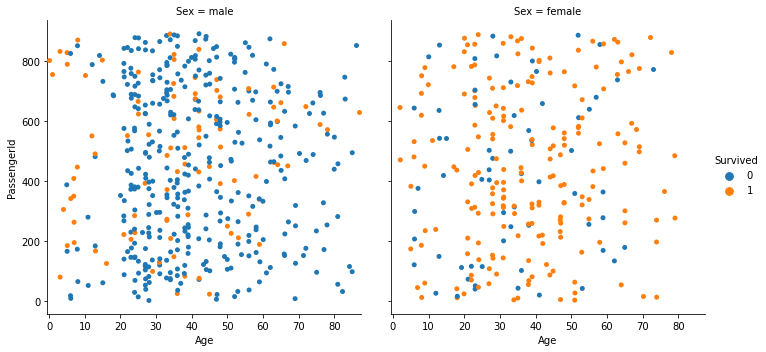

In [54]:
graph_sex = sns.catplot(x='Age', y='PassengerId', hue='Survived', col='Sex', kind='strip', data=train);
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

## Data Cleaning

Here we combine the train and test datasets before we throw them into our model. Initially we looked to test for survival from pclass, sex, age, sibsp, parch, and fare. Since the data sets contain some missing values, we also chose to drop the rows the contian null values. 

In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we set male as 0 and female as 1 since we want out model to only read in numeric values. Next we drop any rows containing NaN (null) values after we pull the features we want to test for. We did tgis to reduce noise, but this could have affected the performance of our model since our training data dropped from 891 records to about 714. In the future, we could consider imputing the missing values ourselves based correlations with the other data in the dataset.  

In [56]:
train['Sex'] = train['Sex'].replace({'male':0})
train['Sex'] = train['Sex'].replace({'female':1})

test['Sex'] = test['Sex'].replace({'male':0})
test['Sex'] = test['Sex'].replace({'female':1})

train_new = train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

train_new.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

train_new

C:\Users\Simon\AppData\Local\Temp\ipykernel_17824\2298423056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.dropna(axis=0, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [57]:
train_X = train_new.drop(['Survived'], axis = 1).to_numpy()
train_y = train_new['Survived'].to_numpy()

test_X = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

train_X

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [58]:
from sklearn.model_selection import train_test_split

#Splits training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=0)


Here we build our Logistics Regression model with an L2 (Ridge) penalty. We configured hyperparamters such as Cs and cv. 
Notes:
-   The highter the Cs was set, the more time out logistic model took to run. 
-   We could only set a cv of 9 or less since the least populated class in y has only 9 members. 

In [59]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs=30, cv=9)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

The following shows the accuracy scores of our Training and Validation data. 
Note:
-   Our Ridge Regression model had a higher training score, but our Lasso Regression model obtained a higher Validation score. 

In [60]:
clf.fit(X_train, y_train)

print("Accruacy Score of Training: %.4f" % clf.score(X_train, y_train))
print("Accuracy Score of Validation %.4f" % clf.score(X_val, y_val))

Accruacy Score of Training: 0.7986
Accuracy Score of Validation 0.8042


## Ploting the learning curve

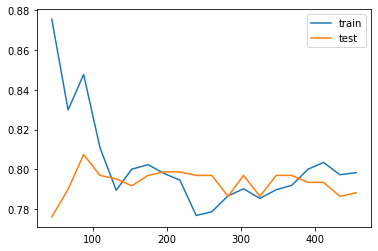

In [61]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='test')
plt.legend()

In [62]:
predictions = clf.predict(X_val)

## Confusion Matrix

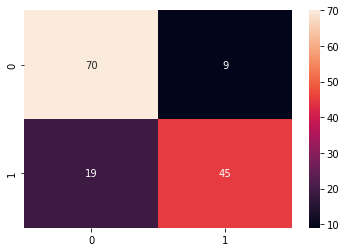

In [65]:
cm=confusion_matrix(y_val, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

<br> Precision = TP/TP+FP = 70/(70+9) = 0.886
<br> Recal = TP/TP+FN = 70/(70+19) = 0.787
<br> F1 Score = 2/((1/Precision)+(1/Recall)) = 0.835 = 83%

## ROC Curve

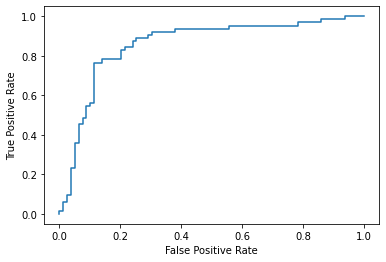

In [64]:
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
